In [73]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict

# Load pipeline results data
with open('pipeline_results.json', 'r') as f:
    data = json.load(f)

print(f"Total executions: {data['count']}")
print(f"Last updated: {data['updated_at']}")

# Analyze data structure
executions = data['executions']
print(f"\nExecution conversations: {len(executions)}")

# Count conversations by number of iterations
iteration_counts = defaultdict(int)
for conv_id, execution in executions.items():
    iteration_counts[execution['total_iterations']] += 1
    
print("\nIterations distribution:")
for iterations, count in sorted(iteration_counts.items()):
    print(f"  {iterations} iteration(s): {count} conversations")


Total executions: 84
Last updated: 2025-10-02T01:03:54.4248708-03:00

Execution conversations: 84

Iterations distribution:
  1 iteration(s): 8 conversations
  2 iteration(s): 76 conversations


In [74]:
# Filter conversations that have exactly 2 iterations for comparison and group by model
two_iteration_conversations = []
for conv_id, execution in executions.items():
    if execution['total_iterations'] == 2:
        two_iteration_conversations.append((conv_id, execution))

print(f"Conversations with 2+ iterations: {len(two_iteration_conversations)}")

# Group conversations by model
model_groups = defaultdict(list)
for conv_id, execution in two_iteration_conversations:
    # Get model from execution or use default if not available
    model = execution.get('model', 'chatgpt-4o-latest')  # Default model if not specified
    model_groups[model].append((conv_id, execution))

print(f"\nModels found:")
for model, conversations in model_groups.items():
    print(f"  {model}: {len(conversations)} conversations")

# Extract metrics for each model
model_data = {}
for model, conversations in model_groups.items():
    if len(conversations) == 0:
        continue
        
    print(f"\nProcessing model: {model}")
    
    metrics_data = {
        'conversation_id': [],
        'iteration_1_parse_success_rate': [],
        'iteration_2_parse_success_rate': [],
        'iteration_1_execution_success_rate': [],
        'iteration_2_execution_success_rate': [],
        'iteration_1_overall_success_rate': [],
        'iteration_2_overall_success_rate': [],
        'iteration_1_total_statements': [],
        'iteration_2_total_statements': [],
        'iteration_1_parse_errors': [],
        'iteration_2_parse_errors': [],
        'iteration_1_execution_errors': [],
        'iteration_2_execution_errors': [],
        'final_success': []
    }

    for conv_id, execution in conversations:
        iter1 = execution['iteration_results'][0]  # First iteration
        iter2 = execution['iteration_results'][1]  # Second iteration
        
        metrics_data['conversation_id'].append(conv_id[:8])  # Short ID for display
        metrics_data['iteration_1_parse_success_rate'].append(iter1['parse_success_rate'])
        metrics_data['iteration_2_parse_success_rate'].append(iter2['parse_success_rate'])
        metrics_data['iteration_1_execution_success_rate'].append(iter1['execution_success_rate'])
        metrics_data['iteration_2_execution_success_rate'].append(iter2['execution_success_rate'])
        metrics_data['iteration_1_overall_success_rate'].append(iter1['overall_success_rate'])
        metrics_data['iteration_2_overall_success_rate'].append(iter2['overall_success_rate'])
        metrics_data['iteration_1_total_statements'].append(iter1['total_statements'])
        metrics_data['iteration_2_total_statements'].append(iter2['total_statements'])
        metrics_data['iteration_1_parse_errors'].append(iter1['parse_errors'])
        metrics_data['iteration_2_parse_errors'].append(iter2['parse_errors'])
        metrics_data['iteration_1_execution_errors'].append(iter1['execution_errors'])
        metrics_data['iteration_2_execution_errors'].append(iter2['execution_errors'])
        metrics_data['final_success'].append(execution['final_success'])

    # Create DataFrame for this model
    df = pd.DataFrame(metrics_data)
    model_data[model] = df
    print(f"  DataFrame shape: {df.shape}")
    print(f"  Final success rate: {df['final_success'].mean():.1%}")


Conversations with 2+ iterations: 76

Models found:
  gpt-4o-mini: 10 conversations
  gpt-5-mini-2025-08-07: 34 conversations
  chatgpt-4o-latest: 26 conversations
  gpt-5-2025-08-07: 6 conversations

Processing model: gpt-4o-mini
  DataFrame shape: (10, 14)
  Final success rate: 0.0%

Processing model: gpt-5-mini-2025-08-07
  DataFrame shape: (34, 14)
  Final success rate: 0.0%

Processing model: chatgpt-4o-latest
  DataFrame shape: (26, 14)
  Final success rate: 3.8%

Processing model: gpt-5-2025-08-07
  DataFrame shape: (6, 14)
  Final success rate: 16.7%



=== Creating plots for model: gpt-4o-mini ===


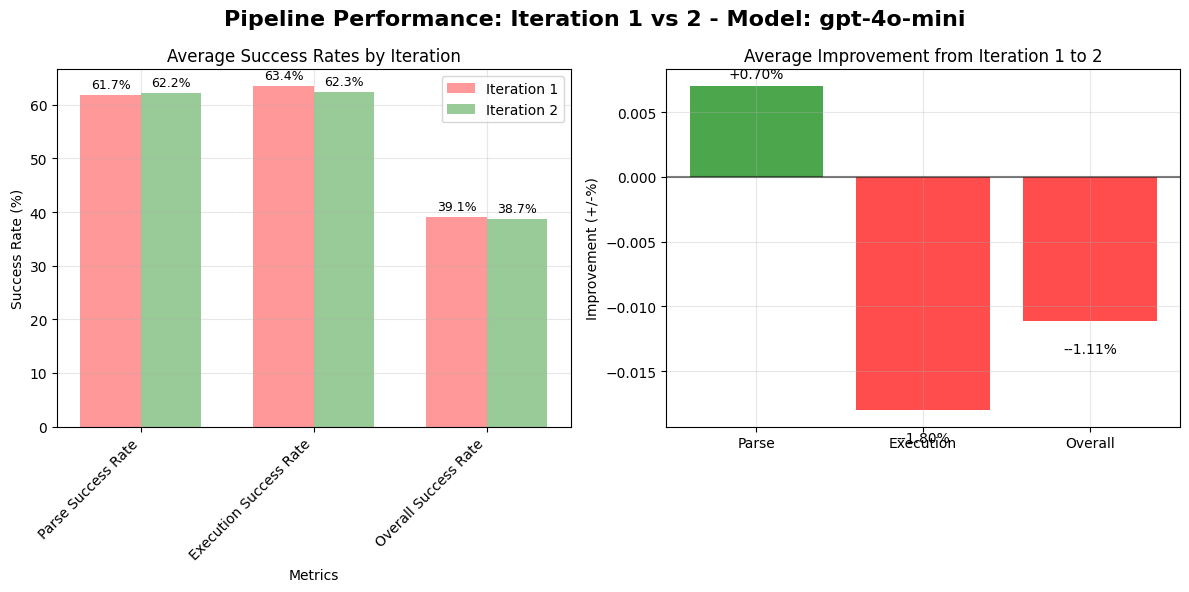


=== Creating plots for model: gpt-5-mini-2025-08-07 ===


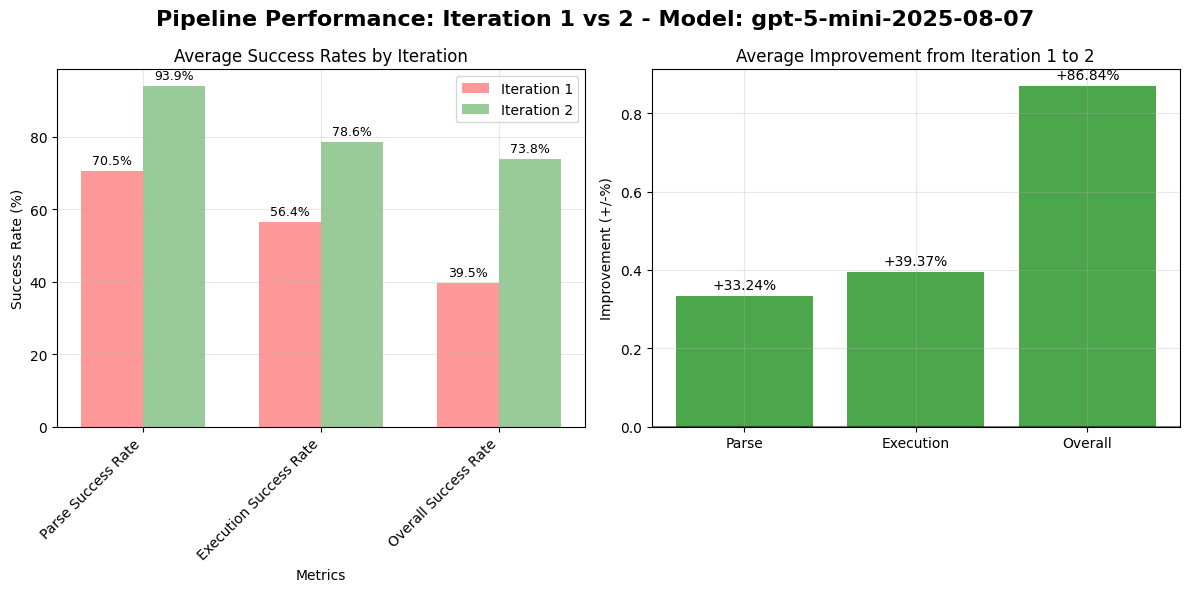


=== Creating plots for model: chatgpt-4o-latest ===


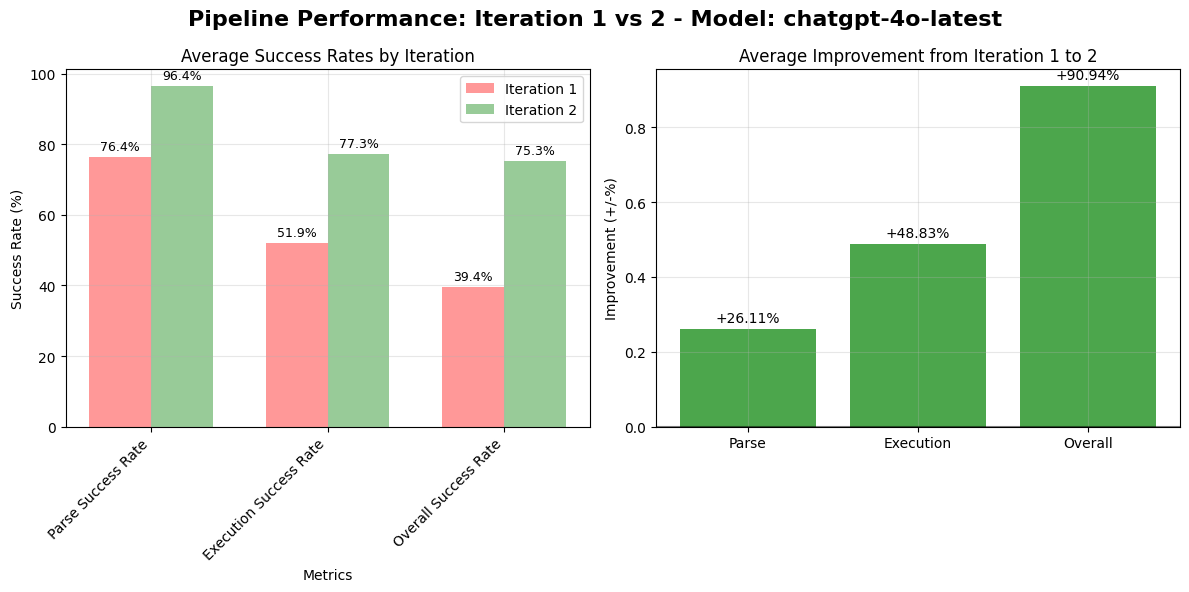


=== Creating plots for model: gpt-5-2025-08-07 ===


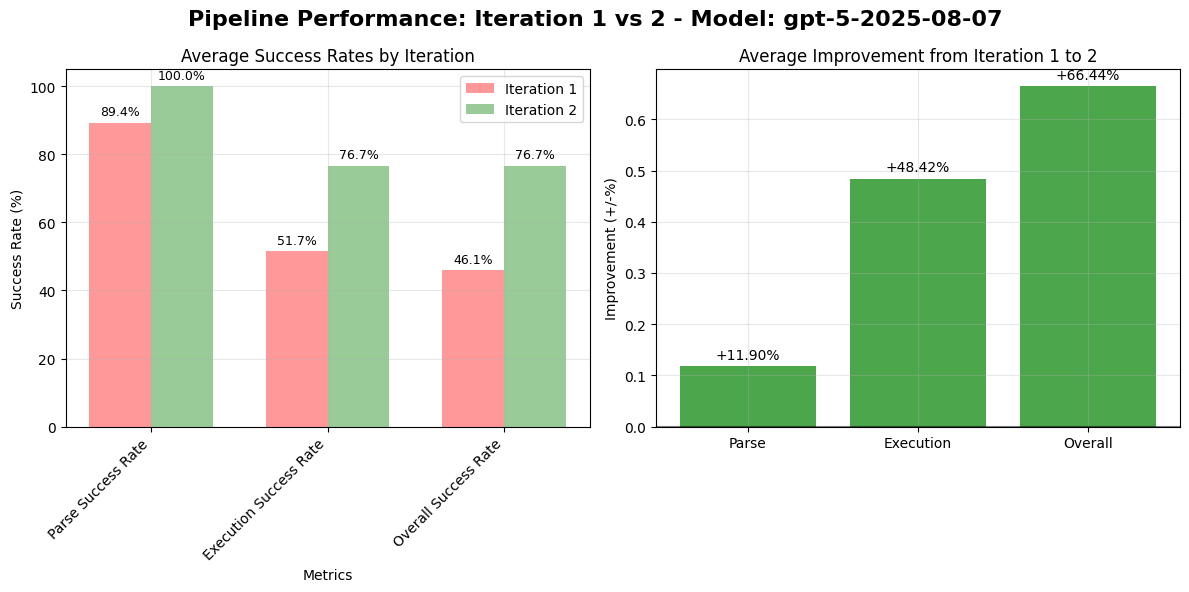


=== Cross-Model Comparison Summary ===


C:\Users\sebad\AppData\Local\Temp\ipykernel_15324\841757178.py:145: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(models, rotation=45, ha='right')


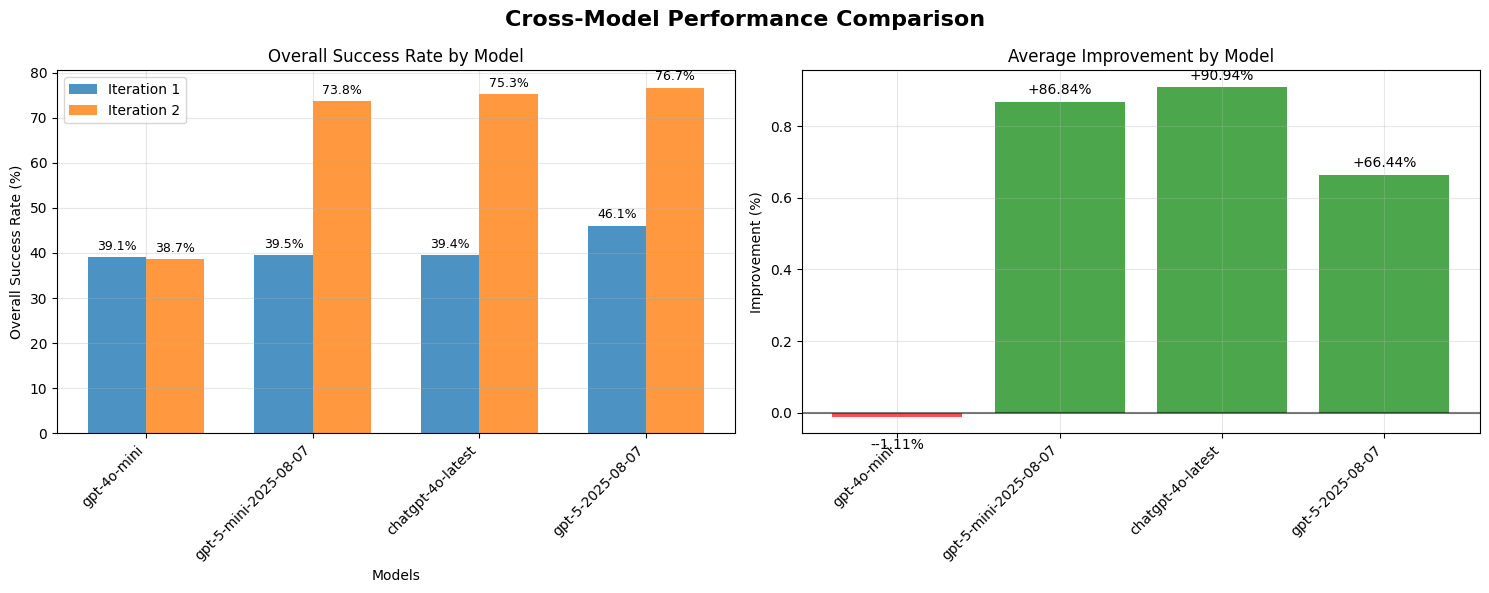

In [75]:
# Create comprehensive comparison visualizations for each model
plt.style.use('default')

def create_model_comparison_plots(model_name, df):
    """Create comparison plots for a specific model"""
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f'Pipeline Performance: Iteration 1 vs 2 - Model: {model_name}', fontsize=16, fontweight='bold')

    # Define width for all plots
    width = 0.35

    # 1. Success Rates Comparison (Bar Chart)
    ax1 = axes[0]
    success_metrics = ['Parse Success Rate', 'Execution Success Rate', 'Overall Success Rate']
    iter1_means = [
        df['iteration_1_parse_success_rate'].mean(),
        df['iteration_1_execution_success_rate'].mean(),
        df['iteration_1_overall_success_rate'].mean()
    ]
    iter2_means = [
        df['iteration_2_parse_success_rate'].mean(),
        df['iteration_2_execution_success_rate'].mean(),
        df['iteration_2_overall_success_rate'].mean()
    ]

    x = np.arange(len(success_metrics))

    bars1 = ax1.bar(x - width/2, iter1_means, width, label='Iteration 1', alpha=0.8, color='#ff7f7f')
    bars2 = ax1.bar(x + width/2, iter2_means, width, label='Iteration 2', alpha=0.8, color='#7fbf7f')

    ax1.set_xlabel('Metrics')
    ax1.set_ylabel('Success Rate (%)')
    ax1.set_title('Average Success Rates by Iteration')
    ax1.set_xticks(x)
    ax1.set_xticklabels(success_metrics, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax1.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

    # 2. Improvement Analysis
    ax2 = axes[1]
    overall_improvement = (df['iteration_2_overall_success_rate'].mean() / df['iteration_1_overall_success_rate'].mean()) -1
    parse_improvement = (df['iteration_2_parse_success_rate'].mean() / df['iteration_1_parse_success_rate'].mean()) -1
    exec_improvement = (df['iteration_2_execution_success_rate'].mean() / df['iteration_1_execution_success_rate'].mean()) -1

    improvements = [parse_improvement, exec_improvement, overall_improvement]
    improvement_labels = ['Parse', 'Execution', 'Overall']
    colors_imp = ['green' if imp > 0 else 'red' for imp in improvements]

    bars_imp = ax2.bar(improvement_labels, improvements, color=colors_imp, alpha=0.7)
    ax2.set_ylabel('Improvement (+/-%)')
    ax2.set_title('Average Improvement from Iteration 1 to 2')
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)

    # Add value labels
    for bar, imp in zip(bars_imp, improvements):
        height = bar.get_height()
        ax2.annotate(f'{'+' if height >= 0 else '-'}{height*100:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3 if height >= 0 else -15),
                    textcoords="offset points",
                    ha='center', va='bottom' if height >= 0 else 'top', fontsize=10)

    plt.tight_layout()
    plt.show()
    
    return fig

# Create plots for each model
model_figures = {}
for model_name, df in model_data.items():
    if len(df) > 0:  # Only create plots if we have data
        print(f"\n=== Creating plots for model: {model_name} ===")
        fig = create_model_comparison_plots(model_name, df)
        model_figures[model_name] = fig

# Summary comparison across models
if len(model_data) > 1:
    print(f"\n=== Cross-Model Comparison Summary ===")
    
    # Create summary comparison
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Cross-Model Performance Comparison', fontsize=16, fontweight='bold')
    
    models = list(model_data.keys())
    colors = plt.cm.Set3(np.linspace(0, 1, len(models)))
    
    # Overall success rate comparison
    ax1 = axes[0]
    iter1_rates = []
    iter2_rates = []
    
    for model in models:
        df = model_data[model]
        iter1_rates.append(df['iteration_1_overall_success_rate'].mean())
        iter2_rates.append(df['iteration_2_overall_success_rate'].mean())
    
    x = np.arange(len(models))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, iter1_rates, width, label='Iteration 1', alpha=0.8)
    bars2 = ax1.bar(x + width/2, iter2_rates, width, label='Iteration 2', alpha=0.8)
    
    ax1.set_xlabel('Models')
    ax1.set_ylabel('Overall Success Rate (%)')
    ax1.set_title('Overall Success Rate by Model')
    ax1.set_xticks(x)
    ax1.set_xticklabels(models, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax1.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)
    
    # Improvement comparison
    ax2 = axes[1]
    improvements = []
    
    for model in models:
        df = model_data[model]
        overall_improvement = (df['iteration_2_overall_success_rate'].mean() / df['iteration_1_overall_success_rate'].mean()) - 1
        improvements.append(overall_improvement)
    
    colors_imp = ['green' if imp > 0 else 'red' for imp in improvements]
    bars_imp = ax2.bar(models, improvements, color=colors_imp, alpha=0.7)
    ax2.set_ylabel('Improvement (%)')
    ax2.set_title('Average Improvement by Model')
    ax2.set_xticklabels(models, rotation=45, ha='right')
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # Add value labels
    for bar, imp in zip(bars_imp, improvements):
        height = bar.get_height()
        ax2.annotate(f'{'+' if height >= 0 else '-'}{height*100:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3 if height >= 0 else -15),
                    textcoords="offset points",
                    ha='center', va='bottom' if height >= 0 else 'top', fontsize=10)
    
    plt.tight_layout()
    plt.show()
else:
    print("Only one model found - no cross-model comparison available")


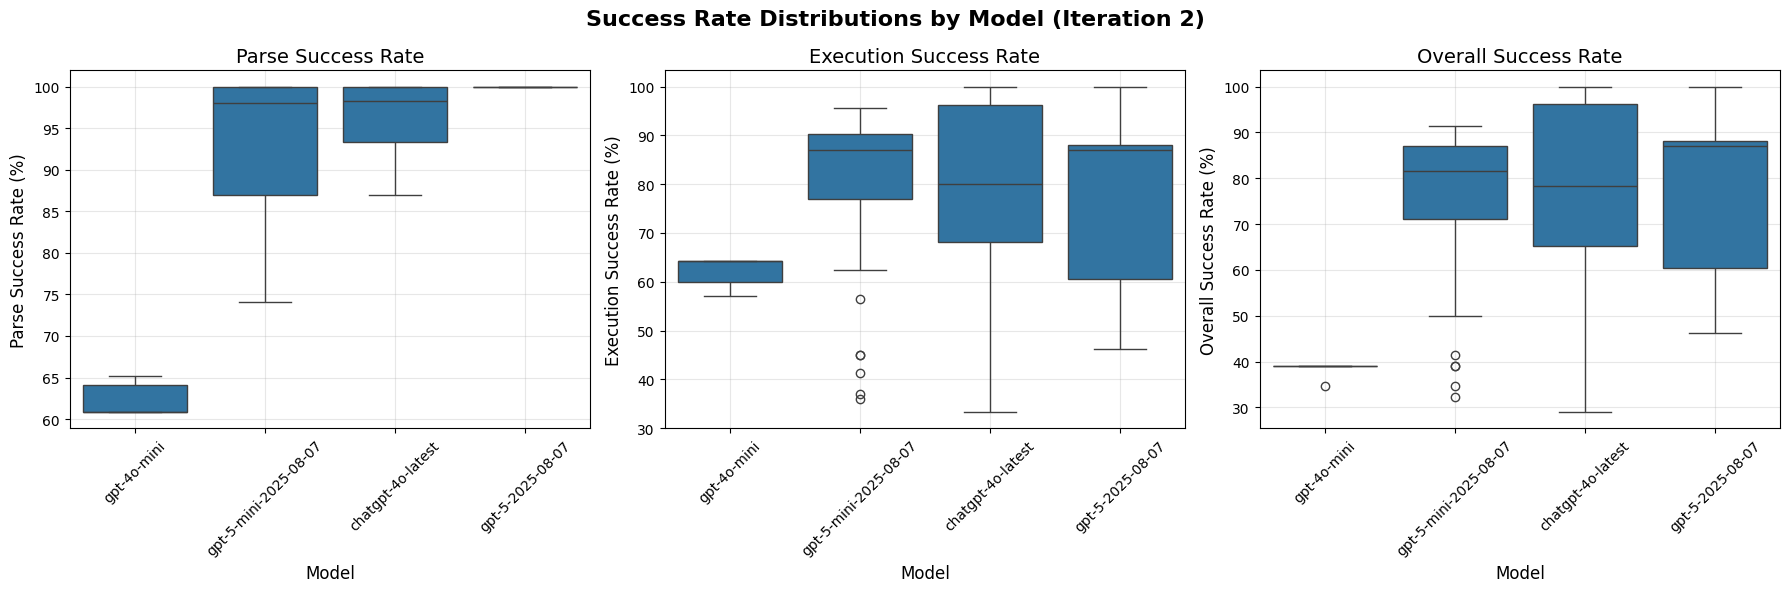

Success Rate Summary by Model (Iteration 2):

gpt-4o-mini:
  Parse     - Mean: 62.2%, Median: 60.9%, Std: 2.1%
  Execution - Mean: 62.3%, Median: 64.3%, Std: 2.7%
  Overall   - Mean: 38.7%, Median: 39.1%, Std: 1.4%

gpt-5-mini-2025-08-07:
  Parse     - Mean: 93.9%, Median: 98.1%, Std: 7.4%
  Execution - Mean: 78.6%, Median: 87.0%, Std: 18.3%
  Overall   - Mean: 73.8%, Median: 81.5%, Std: 17.8%

chatgpt-4o-latest:
  Parse     - Mean: 96.4%, Median: 98.3%, Std: 4.3%
  Execution - Mean: 77.3%, Median: 79.9%, Std: 20.9%
  Overall   - Mean: 75.3%, Median: 78.3%, Std: 22.7%

gpt-5-2025-08-07:
  Parse     - Mean: 100.0%, Median: 100.0%, Std: 0.0%
  Execution - Mean: 76.7%, Median: 87.0%, Std: 22.1%
  Overall   - Mean: 76.7%, Median: 87.0%, Std: 22.1%


In [76]:
# Create grid of boxplots for different success rates by model (Iteration 2 only)
import seaborn as sns

# Prepare data for boxplots - only iteration 2
parse_data = []
execution_data = []
overall_data = []

for model_name, df in model_data.items():
    # Parse success rates
    for rate in df['iteration_2_parse_success_rate']:
        parse_data.append({
            'Model': model_name,
            'Parse Success Rate': rate
        })
    
    # Execution success rates
    for rate in df['iteration_2_execution_success_rate']:
        execution_data.append({
            'Model': model_name,
            'Execution Success Rate': rate
        })
    
    # Overall success rates
    for rate in df['iteration_2_overall_success_rate']:
        overall_data.append({
            'Model': model_name,
            'Overall Success Rate': rate
        })

# Convert to DataFrames
parse_df = pd.DataFrame(parse_data)
execution_df = pd.DataFrame(execution_data)
overall_df = pd.DataFrame(overall_data)

# Create the grid of boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Success Rate Distributions by Model (Iteration 2)', fontsize=16, fontweight='bold')

# Plot 1: Parse Success Rate
sns.boxplot(data=parse_df, x='Model', y='Parse Success Rate', ax=axes[0])
axes[0].set_title('Parse Success Rate', fontsize=14)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylabel('Parse Success Rate (%)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Plot 2: Execution Success Rate
sns.boxplot(data=execution_df, x='Model', y='Execution Success Rate', ax=axes[1])
axes[1].set_title('Execution Success Rate', fontsize=14)
axes[1].set_xlabel('Model', fontsize=12)
axes[1].set_ylabel('Execution Success Rate (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# Plot 3: Overall Success Rate
sns.boxplot(data=overall_df, x='Model', y='Overall Success Rate', ax=axes[2])
axes[2].set_title('Overall Success Rate', fontsize=14)
axes[2].set_xlabel('Model', fontsize=12)
axes[2].set_ylabel('Overall Success Rate (%)', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics for iteration 2 only
print("Success Rate Summary by Model (Iteration 2):")
print("="*60)
for model_name, df in model_data.items():
    # Parse success rates
    parse_mean = df['iteration_2_parse_success_rate'].mean()
    parse_median = df['iteration_2_parse_success_rate'].median()
    parse_std = df['iteration_2_parse_success_rate'].std()
    
    # Execution success rates
    exec_mean = df['iteration_2_execution_success_rate'].mean()
    exec_median = df['iteration_2_execution_success_rate'].median()
    exec_std = df['iteration_2_execution_success_rate'].std()
    
    # Overall success rates
    overall_mean = df['iteration_2_overall_success_rate'].mean()
    overall_median = df['iteration_2_overall_success_rate'].median()
    overall_std = df['iteration_2_overall_success_rate'].std()
    
    print(f"\n{model_name}:")
    print(f"  Parse     - Mean: {parse_mean:.1f}%, Median: {parse_median:.1f}%, Std: {parse_std:.1f}%")
    print(f"  Execution - Mean: {exec_mean:.1f}%, Median: {exec_median:.1f}%, Std: {exec_std:.1f}%")
    print(f"  Overall   - Mean: {overall_mean:.1f}%, Median: {overall_median:.1f}%, Std: {overall_std:.1f}%")
